## Exercise MovieLens 电影数据分析

### 作业要求：（单人组）
Task1：在movielens 1M的数据集上，统计分析观影的性别偏好。

需要完成：

综合观影信息、评分信息，设计合理方案分别筛选出前20部比较流行的（rating > 300）男性/女性 偏好电影。

针对不同类型的电影（genres），统计分析男/女偏好程度（需要做归一化），通过双色直方图对比显示。

Task2：在movielens 1M的数据集上，通过观影及评分信息，预测观众的年龄-性别

需要完成：

拆分训练集-测试集（20%评测），实现评测方案（准确率-召回率）

实现分类器模型，对观影数超过100的用户进行预测。调整模型及参数。包括并不限于特征降维来获得较好的效果。（提示：在用户年龄预测问题中，由于年龄段本身是具有序关系的。常规的模型优化方法不一定会有明显的效果， 有兴趣的同学可以看一下ordinal regression模型。有余力可以尝试，不算分。）

Task3：在movielens 1M的数据集上，通过观影-评分及电影简介等信息，对观影>100的用户实现用户画像。

包括且不限于：最喜欢-最不喜欢的电影类型。输出3-5部代表性的电影反映该用户的观影偏好。（可以通过对偏好的电影集合运用图分析技术或SVD分解来实现）

⾃定义⼀些合理的类型概念，如，家庭主妇最爱，烧脑神剧等，对用户进行标签标记。或者综合电影风格，生成用户观影偏好的雷达图。生成用户偏好词云等。


#### 读取moivelens 1M 数据（data目录）

- 1. user， movies， rating三个表

In [1]:
import numpy as np
import pandas as pd
# Reading ratings file
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('data/users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('data/movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [2]:
ratings[int(1e6):int(1e6+10)]

,user_id,movie_id,rating,timestamp
1000000,6040,3552,2,956715942
1000001,6040,1952,5,957717017
1000002,6040,1954,3,960972782
1000003,6040,25,3,957717322
1000004,6040,348,2,956704972
1000005,6040,29,4,960972720
1000006,6040,1960,4,956715597
1000007,6040,1961,4,956703977
1000008,6040,1962,3,956715569
1000009,6040,1963,4,960972887


In [3]:
# a = data_mat_freq @ data_mat_freq.T  # 20分钟
# np.save("data/movie_coRating_count",a ) #保存数组
# a[0]
# 该数组在data目录里作为环数据境下发，可以直接使用

In [4]:
# Reading movies info file
movies_info = pd.read_csv('data/info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

In [5]:
movies_info

,movie_id,name,genre,release_time,intro,directors,stars
0,1,Toy Story (1995),Animation|Adventure|Comedy,22 November 1995 (USA),A cowboy doll is profoundly threatened and jea...,John Lasseter,Tom Hanks|Tim Allen|Don Rickles
1,2,Jumanji (1995),Adventure|Comedy|Family,15 December 1995 (USA),When two kids find and play a magical board ga...,Joe Johnston,Robin Williams|Kirsten Dunst|Bonnie Hunt
2,3,Grumpier Old Men (1995),Comedy|Romance,22 December 1995 (USA),John and Max resolve to save their beloved bai...,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,22 December 1995 (USA),"Based on Terry McMillan's novel, this film fol...",Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine
4,5,Father of the Bride Part II (1995),Comedy|Family|Romance,8 December 1995 (USA),George Banks must deal not only with the pregn...,Charles Shyer,Steve Martin|Diane Keaton|Martin Short
...,...,...,...,...,...,...,...
9737,193581,Kuroshitsuji: Book of the Atlantic (2017),Animation,21 January 2017 (Japan),A young lord and his demon butler board a luxu...,Noriyuki Abe|Stephen Hoff,Bryn Apprill|Dawn Michelle Bennett|Justin Briner
9738,193583,NÃ´gÃªmu nÃ´raifu: Zero (2017),Animation|Adventure|Comedy,19 July 2019 (China),"Adaption of the sixth Light Novel of series, i...",Atsuko Ishizuka,Alexandra Bedford|Jessica Boone|Ricardo Contreras
9739,193585,Flint (2017),Drama,TV Movie 28 October 2017,A woman deals with the toxic water scandal in ...,Bruce Beresford,Marin Ireland|Betsy Brandt|Queen Latifah
9740,193587,Bungou Stray Dogs: Dead Apple (2018),Animation,3 March 2018 (Japan),Rivalry between groups of criminals and detect...,Takuya Igarashi,Brian Beacock|Ray Chase|Lucien Dodge


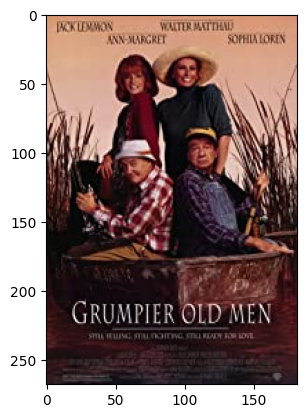

In [6]:
import matplotlib.pyplot as plt
import cv2 
poster_i = cv2.imread('data/poster/3.jpg',cv2.IMREAD_COLOR)
poster_i = cv2.cvtColor(poster_i, cv2.COLOR_BGR2RGB)
plt.imshow(poster_i)  

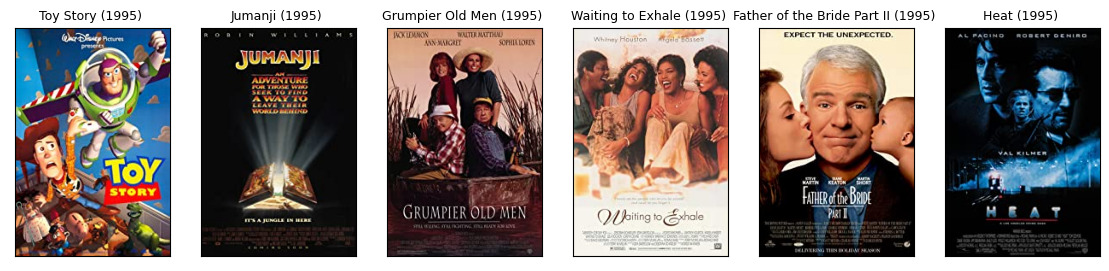

In [7]:
plt.figure(figsize=(14,10))
for i in movies_info[:6]['movie_id']:
    plt.subplot(1, 6, i)
    poster_i = cv2.imread('data/poster/'+ str(i) + '.jpg', 1)
    poster_i = cv2.cvtColor(poster_i, cv2.COLOR_BGR2RGB)
    plt.imshow(poster_i)
    plt.title(movies_info.iloc[i-1]['name'], size=9)
    plt.xticks(())
    plt.yticks(())
plt.show()

## Prepare Data

In [8]:
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])
users = pd.read_csv('data/users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])
movies = pd.read_csv('data/movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])
movies_info = pd.read_csv('data/info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)
movies = pd.merge(movies, movies_info, on=['movie_id'], how='left').loc[:, ['movie_id', 'title', 'genres', 'release_time', 'intro', 'directors', 'stars']]
movie_corating_count = np.load("data/movie_coRating_count.npy")

## Task 1: 在movielens 1M的数据集上，统计分析观影的性别偏好。

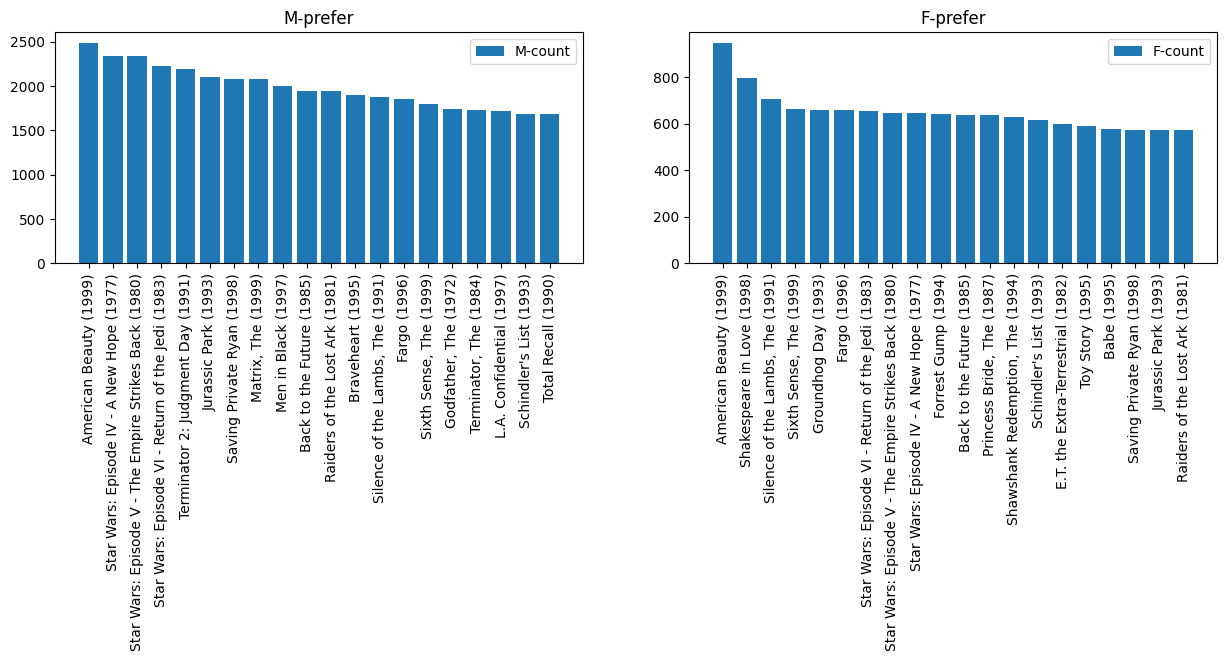

In [9]:
# Step 1 筛选前20部比较流行的男性/女性偏好电影。
movie_rating_count = ratings.loc[:, ['movie_id', 'rating']].groupby('movie_id').count()
movie_rating_count.rename(columns={'rating': 'rating_count'}, inplace=True)
movie_rating_mean = ratings.loc[:, ['movie_id', 'rating']].groupby('movie_id').mean()
movie_rating_mean.rename(columns={'rating': 'rating_mean'}, inplace=True)
movie_popular = pd.merge(movies, movie_rating_count, on='movie_id').loc[:, ['movie_id', 'title', 'rating_count']]
movie_popular = pd.merge(movie_popular, movie_rating_mean, on='movie_id')

movie_popular = movie_popular[movie_popular.rating_count >= 300]
movie_popular = movie_popular[movie_popular.rating_mean >= 3.5]

popular_rating = pd.merge(ratings, movie_popular, on='movie_id', how='right')
popular_rating = pd.merge(popular_rating, users.loc[:, ['user_id', 'gender']], on='user_id')

popular_rating_male = popular_rating[popular_rating.gender == 'M']
prefer_male = popular_rating_male.groupby('title').count().iloc[:, 0].sort_values(ascending=False)[:20]

popular_rating_female = popular_rating[popular_rating.gender == 'F']
prefer_female = popular_rating_female.groupby('title').count().iloc[:, 0].sort_values(ascending=False)[:20]

plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)
plt.bar(prefer_male.index, prefer_male.values, label='M-count')
plt.xticks(rotation=90)
plt.title('M-prefer')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(prefer_female.index, prefer_female.values, label='F-count')
plt.xticks(rotation=90)
plt.title('F-prefer')
plt.legend()

plt.show()

In [10]:
# Step 2 针对不同类型的电影，统计分析男/女偏好程度，通过双色直方图对比显示。
rating_info = pd.merge(ratings, movies.loc[:, ['movie_id', 'genres']], on='movie_id')
rating_info = pd.merge(rating_info, users.loc[:, ['user_id', 'gender']], on='user_id')

def genres_count(rating_info_gender):
    genres_lst = rating_info_gender.genres.apply(lambda x: x.split('|')).values
    lst = []
    for i in genres_lst:
        lst += i
    count = sorted([(i, lst.count(i)) for i in set(lst)], key=lambda x: x[1], reverse=True)
    return pd.DataFrame(count, columns=['genres', 'count'])
rating_info_male = rating_info[rating_info.gender == 'M']
rating_info_female = rating_info[rating_info.gender == 'F']
genres_count_male = genres_count(rating_info_male)
genres_count_female = genres_count(rating_info_female)

genres_count_merge = pd.merge(genres_count_male, genres_count_female, on='genres')
genres_count_merge.columns = ['genres', 'count_m', 'count_f']
genres_count_merge.count_m /= len(rating_info_male)
genres_count_merge.count_f /= len(rating_info_female)

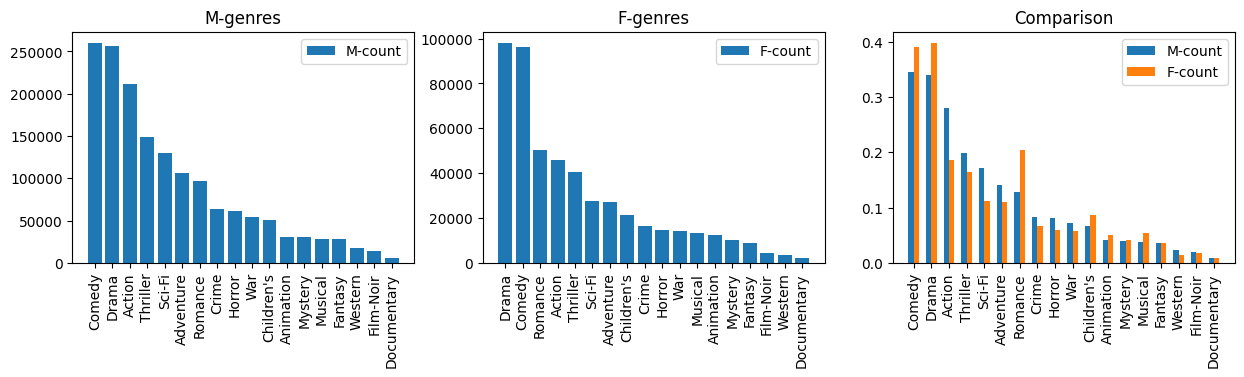

In [11]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.bar(genres_count_male.loc[:, 'genres'].values, 
        genres_count_male.loc[:, 'count'].values, label='M-count')
plt.xticks(rotation=90)
plt.title('M-genres')
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(genres_count_female.loc[:, 'genres'].values, 
        genres_count_female.loc[:, 'count'].values, label='F-count')
plt.xticks(rotation=90)
plt.title('F-genres')
plt.legend()

plt.subplot(1, 3, 3)
x = np.arange(18)
plt.bar(x-0.15, genres_count_merge.loc[:, 'count_m'].values, label='M-count', width=0.3)
plt.bar(x+0.15, genres_count_merge.loc[:, 'count_f'].values, label='F-count', width=0.3)
plt.xticks(rotation=90)
plt.xticks(x, genres_count_merge.loc[:, 'genres'].values)
plt.title('Comparison')
plt.legend()

plt.show()

In [12]:
# Step 3 On a specifit genre
rating_info = pd.merge(ratings, movies.loc[:, ['movie_id', 'genres']], on='movie_id')
rating_info = pd.merge(rating_info, users.loc[:, ['user_id', 'gender']], on='user_id')
one_hot_genres = rating_info.genres.str.get_dummies(sep='|')
rating_info = pd.merge(rating_info, one_hot_genres, left_index=True, right_index=True)
action = rating_info[rating_info.Action==1]
action_male = action[action.gender=='M']
action_female = action[action.gender=='F']

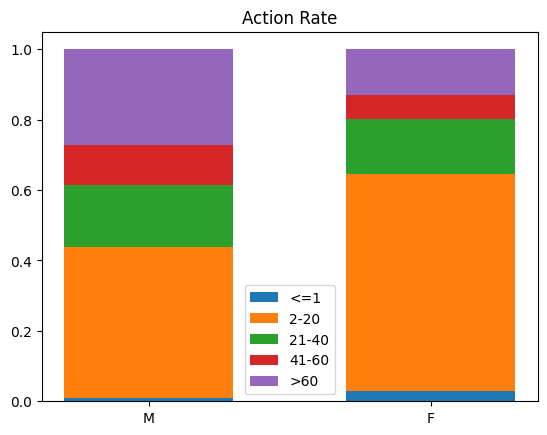

In [13]:
def count_action_number(df):
    return df.groupby('user_id').count().iloc[:, 0].tolist()
def split_count(lst, split=[1, 20, 40, 60]):
    res = np.zeros(len(split)+1)
    a = np.array(lst)
    for idx, i in enumerate(split):
        res[idx] = len(a[a<=i])
    res[-1] = len(lst)
    for i in range(len(res)-1, 0, -1):
        res[i] = res[i] - res[i-1]
    return res / len(lst)

action_split_male = split_count(count_action_number((action_male)))
action_split_female = split_count(count_action_number((action_female)))
gender = ['M', 'F']
labels = ['<=1', '2-20', '21-40', '41-60', '>60']
action_data = np.array([(0, 0)] + list(zip(action_split_male, action_split_female)))
for i in range(1, len(action_data)):
    plt.bar(gender, height=action_data[i], bottom=sum(action_data[:i]), width=0.6, label=labels[i-1])
plt.title('Action Rate')
plt.legend()
plt.show()

## Prepare Data

In [14]:
rating_info = pd.merge(ratings, movies.loc[:, ['movie_id', 'genres']], on='movie_id')
one_hot_genres = rating_info.genres.str.get_dummies(sep='|')
rating_info = pd.merge(rating_info, one_hot_genres, left_index=True, right_index=True)

rating_info_rating = rating_info.copy()
categories = rating_info_rating.columns[5:]
for c in categories:
    rating_info_rating[c] *= rating_info_rating['rating']
rating_info_rating_sum = rating_info_rating.groupby('user_id').sum().loc[:, slice('Action', 'Western')]
rating_info_rating_sum.columns = [i+'-avg' for i in categories]

user_info = pd.merge(rating_info.groupby('user_id').sum().loc[:, slice('Action', 'Western')], rating_info_rating_sum, on='user_id')
user_info = pd.merge(user_info, users.loc[:, ['user_id', 'gender', 'age_desc']], on='user_id')
for c in categories:
    user_info[c+'-avg'] /= user_info[c]+1e-12

gender_dict = {'M': 1, 'F': 0}
age_set = list(set(user_info['age_desc']))
age_dict = {age: i for (i, age) in enumerate(age_set)}
print(age_dict)
user_info.gender = user_info.gender.apply(lambda x: gender_dict[x])
user_info.age_desc = user_info.age_desc.apply(lambda x: age_dict[x])
user_info['movie_sum'] = user_info.loc[:, slice('Action', 'Western')].sum(axis=1)
user_info = user_info[user_info['movie_sum'] > 100].loc[:, slice('Action', 'age_desc')]
user_info

{'45-49': 0, '25-34': 1, '35-44': 2, '50-55': 3, 'Under 18': 4, '18-24': 5, '56+': 6}


,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Horror-avg,Musical-avg,Mystery-avg,Romance-avg,Sci-Fi-avg,Thriller-avg,War-avg,Western-avg,gender,age_desc
0,5,5,18,20,14,2,0,21,3,0,...,0.000000,4.285714,0.000000,3.666667,4.333333,3.666667,5.000000,0.000000,0,4
1,56,19,0,0,25,12,0,79,1,1,...,3.000000,0.000000,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333,1,6
2,23,25,3,3,30,0,0,8,2,0,...,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667,1,1
4,31,9,4,6,56,21,6,104,0,3,...,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000,1,1
5,11,8,9,16,32,2,0,22,2,0,...,0.000000,4.315789,0.000000,4.000000,3.500000,3.666667,4.000000,3.625000,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6034,63,34,4,28,130,20,0,112,12,3,...,2.333333,1.500000,3.300000,3.047619,2.762500,1.972973,3.307692,2.333333,0,1
6035,154,83,34,54,261,53,11,372,19,17,...,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857,0,1
6036,28,9,1,6,59,18,1,98,4,9,...,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000,0,0
6038,8,10,13,17,65,2,0,28,5,6,...,4.000000,3.690476,4.176471,3.800000,4.250000,4.142857,4.111111,4.500000,0,0


## Task2：在movielens 1M的数据集上，通过观影及评分信息，预测观众的年龄-性别

In [15]:
# Step 1 拆分训练集-测试集（20%评测），实现评测方案（准确率-召回率）
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

X = user_info.loc[:, slice('Action', 'Western-avg')]
y = user_info.loc[:, ['gender', 'age_desc']]
X.loc[:, slice('Action', 'Western')] /= 300
X.loc[:, slice('Action-avg', 'Western-avg')] /= 5
X = np.array(X, dtype=float)
y = np.array(y, dtype=int)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
gender_train =  y_train[:, 0]
gender_test = y_test[:, 0]      # 2 classes
age_train = y_train[:, 1]
age_test = y_test[:, 1]         # 7 classes

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
gender_train = torch.Tensor(gender_train).long()
gender_test = torch.Tensor(gender_test).long()
age_train = torch.Tensor(age_train).long()
age_test = torch.Tensor(age_test).long()

num_to_gender = {num: gender for (gender, num) in gender_dict.items()}
num_to_age = {num: age for (age, num) in age_dict.items()}

e:\Anaconda3\envs\gomoku\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# Step 2 实现分类器模型，对观影数超过100的用户进行预测。调整模型及参数。包括并不限于特征降维来获得较好的效果。
class Net(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.fc1 = nn.Linear(in_channels, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, out_channels)
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X

In [17]:
def acc(res, label):
    eq = len(np.where(res == label)[0])
    l = len(res)
    return eq / l

In [18]:
model_gender = Net(in_channels=36, out_channels=2)
optimizer_gender = optim.SGD(model_gender.parameters(), lr=0.03, momentum=0.99, weight_decay=1e-3)
criterion = nn.CrossEntropyLoss()

best_model_gender = None
best_acc = float('-inf')

model_gender.train()
for epoch in range(1000):
    loss = 0
    optimizer_gender.zero_grad()
    logits = model_gender(X_train)
    loss = criterion(logits, gender_train)
    loss.backward()
    optimizer_gender.step()
    if (epoch+1) % 100 == 0:
        with torch.no_grad():
            gender_train_pred = np.argmax(model_gender(X_train).data, axis=1)
            train_acc = acc(gender_train_pred, gender_train)
            gender_test_pred = np.argmax(model_gender(X_test).data, axis=1)
            test_acc = acc(gender_test_pred, gender_test)
            print(f'Epoch {epoch+1}, loss={loss}, train_acc={train_acc}, test_acc={test_acc}')
            if test_acc > best_acc:
                best_acc = test_acc
                best_model_gender = model_gender

Epoch 100, loss=0.5621033310890198, train_acc=0.7319587628865979, test_acc=0.7445589919816724
Epoch 200, loss=0.4759048521518707, train_acc=0.7800687285223368, test_acc=0.7743413516609393
Epoch 300, loss=0.43951481580734253, train_acc=0.7989690721649485, test_acc=0.7880870561282932
Epoch 400, loss=0.42716482281684875, train_acc=0.8052691867124857, test_acc=0.8029782359679267
Epoch 500, loss=0.41950690746307373, train_acc=0.8087056128293242, test_acc=0.8064146620847652
Epoch 600, loss=0.4104405641555786, train_acc=0.811282932416953, test_acc=0.8052691867124857
Epoch 700, loss=0.40169891715049744, train_acc=0.8124284077892325, test_acc=0.8098510882016037
Epoch 800, loss=0.3928491175174713, train_acc=0.8141466208476518, test_acc=0.8018327605956472
Epoch 900, loss=0.38975876569747925, train_acc=0.8339060710194731, test_acc=0.8018327605956472
Epoch 1000, loss=0.3799871802330017, train_acc=0.8233104238258877, test_acc=0.8041237113402062


In [19]:
from sklearn.metrics import classification_report
label_all = gender_test.detach().numpy()
pred_all = np.argmax(best_model_gender(X_test).data, axis=1)
print(classification_report(label_all, pred_all, digits=3, output_dict=False))

              precision    recall  f1-score   support

           0      0.728     0.372     0.493       223
           1      0.816     0.952     0.879       650

    accuracy                          0.804       873
   macro avg      0.772     0.662     0.686       873
weighted avg      0.793     0.804     0.780       873



In [28]:
model_age = Net(in_channels=36, out_channels=7)
optimizer_age = optim.SGD(model_age.parameters(), lr=0.03, momentum=0.99, weight_decay=1e-3)
criterion = nn.CrossEntropyLoss()

best_model_age = None
best_acc = float('-inf')

model_age.train()
for epoch in range(1000):
    loss = 0
    optimizer_age.zero_grad()
    logits = model_age(X_train)
    loss = criterion(logits, age_train)
    loss.backward()
    optimizer_age.step()
    if (epoch+1) % 100 == 0:
        with torch.no_grad():
            age_train_pred = np.argmax(model_age(X_train).data, axis=1)
            train_acc = acc(age_train_pred, age_train)
            age_test_pred = np.argmax(model_age(X_test).data, axis=1)
            test_acc = acc(age_test_pred, age_test)
            print(f'Epoch {epoch+1}, loss={loss}, train_acc={train_acc}, test_acc={test_acc}')
            if test_acc > best_acc:
                best_acc = test_acc
                best_model_age = model_age
            

Epoch 100, loss=1.692046046257019, train_acc=0.36053837342497136, test_acc=0.36082474226804123
Epoch 200, loss=1.6648629903793335, train_acc=0.35652920962199314, test_acc=0.35738831615120276
Epoch 300, loss=1.621345043182373, train_acc=0.3651202749140893, test_acc=0.35624284077892326
Epoch 400, loss=1.5812686681747437, train_acc=0.3651202749140893, test_acc=0.35853379152348225
Epoch 500, loss=1.5360599756240845, train_acc=0.37399770904925544, test_acc=0.3654066437571592
Epoch 600, loss=1.497530460357666, train_acc=0.3920389461626575, test_acc=0.37800687285223367
Epoch 700, loss=1.4902459383010864, train_acc=0.40034364261168387, test_acc=0.38602520045819017
Epoch 800, loss=1.5137372016906738, train_acc=0.40922107674684993, test_acc=0.39060710194730813
Epoch 900, loss=1.4732939004898071, train_acc=0.40492554410080184, test_acc=0.3963344788087056
Epoch 1000, loss=1.4444067478179932, train_acc=0.41924398625429554, test_acc=0.39862542955326463


In [29]:
label_all = age_test.detach().numpy()
pred_all = np.argmax(best_model_age(X_test).data, axis=1)
print(classification_report(label_all, pred_all, digits=3, output_dict=False))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        89
           1      0.425     0.825     0.561       315
           2      0.302     0.179     0.225       179
           3      0.162     0.100     0.124        60
           4      0.333     0.074     0.121        27
           5      0.484     0.287     0.360       157
           6      0.188     0.065     0.097        46

    accuracy                          0.399       873
   macro avg      0.271     0.219     0.212       873
weighted avg      0.334     0.399     0.331       873



## Prepare Data

In [30]:
user_watch_count = ratings.groupby('user_id').count()
user_watch_count = user_watch_count[user_watch_count['movie_id'] > 100].loc[:, ['movie_id']]
user_watch_count.columns = ['count']
ratings_user_info = pd.merge(ratings.loc[:, ['user_id', 'movie_id', 'rating']], users.loc[:, ['user_id', 'gender', 'age_desc', 'occ_desc']], on='user_id')
ratings_user_info = pd.merge(ratings_user_info, user_watch_count, on='user_id', how='right')
ratings_user_movie_info = pd.merge(ratings_user_info, movies.loc[:, ['movie_id', 'title', 'genres', 'intro']], on='movie_id')
one_hot_genres = ratings_user_movie_info.genres.str.get_dummies(sep='|')
ratings_user_movie_info = pd.merge(ratings_user_movie_info, one_hot_genres, left_index=True, right_index=True)
ratings_user_movie_info.fillna('No description', inplace=True)
one_hot_genres.columns = [i+'-rating' for i in one_hot_genres.columns]
ratings_user_movie_info = pd.merge(ratings_user_movie_info, one_hot_genres.astype(float), left_index=True, right_index=True)
for c in one_hot_genres.columns:
    ratings_user_movie_info[c] *= ratings_user_info['rating']
ratings_user_movie_info

,user_id,movie_id,rating,gender,age_desc,occ_desc,count,title,genres,intro,...,Fantasy-rating,Film-Noir-rating,Horror-rating,Musical-rating,Mystery-rating,Romance-rating,Sci-Fi-rating,Thriller-rating,War-rating,Western-rating
0,2,1357,5,M,56+,self-employed,129,Shine (1996),Drama|Romance,"Pianist David Helfgott, driven by his father a...",...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,8,1357,4,M,25-34,programmer,139,Shine (1996),Drama|Romance,"Pianist David Helfgott, driven by his father a...",...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2,10,1357,5,F,35-44,academic/educator,401,Shine (1996),Drama|Romance,"Pianist David Helfgott, driven by his father a...",...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
3,18,1357,5,F,18-24,clerical/admin,305,Shine (1996),Drama|Romance,"Pianist David Helfgott, driven by his father a...",...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
4,33,1357,4,M,45-49,clerical/admin,391,Shine (1996),Drama|Romance,"Pianist David Helfgott, driven by his father a...",...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843697,5851,3607,5,F,18-24,writer,162,One Little Indian (1973),Comedy|Drama|Western,No description,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
843698,5854,690,3,M,45-49,executive/managerial,410,"Promise, The (Versprechen, Das) (1994)",Romance,No description,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
843699,5878,1842,4,F,25-34,other or not specified,601,Illtown (1996),Crime|Drama,No description,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843700,5938,2909,4,M,25-34,academic/educator,190,"Five Wives, Three Secretaries and Me (1998)",Documentary,No description,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Task3：在movielens 1M的数据集上，通过观影-评分及电影简介等信息，对观影>100的用户实现用户画像。

包括且不限于：最喜欢-最不喜欢的电影类型。输出3-5部代表性的电影反映该用户的观影偏好。（可以通过对偏好的电影集合运用图分析技术或SVD分解来实现）

⾃定义⼀些合理的类型概念，如，家庭主妇最爱，烧脑神剧等，对用户进行标签标记。或者综合电影风格，生成用户观影偏好的雷达图。生成用户偏好词云等。


In [31]:
genres = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
genres_rating = [i+'-rating' for i in genres]
genres_count_sum = ratings_user_movie_info.loc[:, genres].sum()


def preferred_genres_by_sum(df, topk=None, unprefer=False):
    genres_watch_sum = list(zip(genres, (df.loc[:, genres].sum() / genres_count_sum).tolist()))
    return sorted(genres_watch_sum, key=lambda x: x[1], reverse=not unprefer)[:topk]


def preferred_genres_by_rating(df, topk=None, unprefer=False):
    genres_rating_sum = df.loc[:, genres+genres_rating].sum()
    for c, r in zip(genres, genres_rating):
        genres_rating_sum[r] /= (genres_rating_sum[c] + 1e-12)
    genres_rating_avg = zip(genres_rating, genres_rating_sum.loc[genres_rating].tolist())
    return sorted(genres_rating_avg, key=lambda x: x[1], reverse=not unprefer)[:topk]

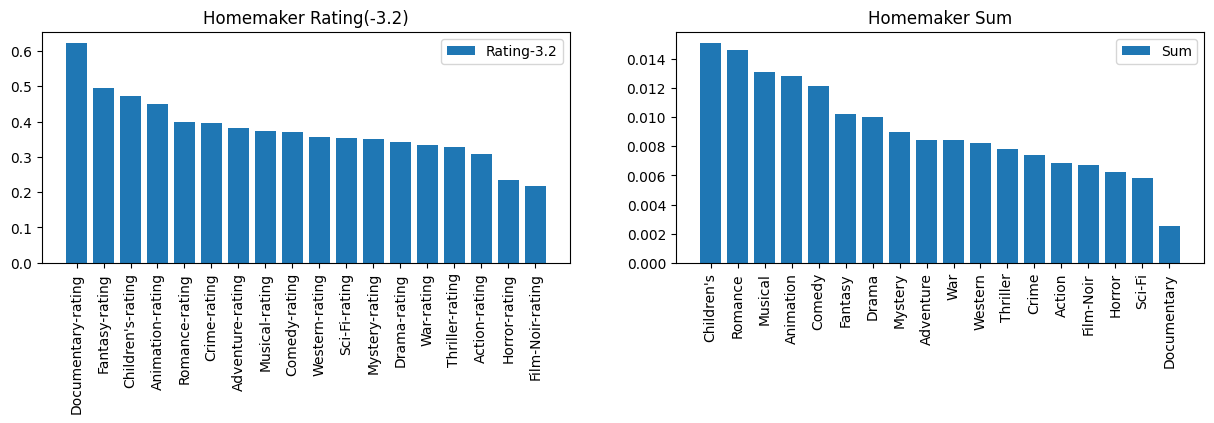

In [32]:
df = ratings_user_movie_info.copy()
df = df[df['occ_desc'] == 'homemaker']
df_r = preferred_genres_by_rating(df)
df_s = preferred_genres_by_sum(df)

plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)
plt.bar([x[0] for x in df_r], 
        [x[1]-3.2 for x in df_r], label='Rating-3.2')
plt.xticks(rotation=90)
plt.title('Homemaker Rating(-3.2)')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar([x[0] for x in df_s], 
        [x[1] for x in df_s], label='Sum')
plt.xticks(rotation=90)
plt.title('Homemaker Sum')
plt.legend()

plt.show()

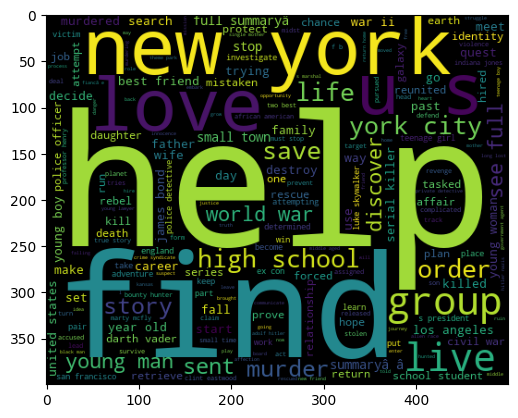

In [33]:
df = ratings_user_movie_info.copy()
df = df[df['occ_desc'] == 'academic/educator']
df = df[df['intro'] != 'No description']
text = ' '.join(df['intro'].tolist()).lower()
from wordcloud import WordCloud
wc = WordCloud(width=500, height=400).generate(text)
plt.imshow(wc)
plt.show()